In [1]:
from lxml import html
import requests
import codecs
import Levenshtein
import pandas as pd

In [4]:
pagina = 'https://dreguera.github.io/'
page = requests.get(pagina)
tree = html.fromstring(page.content)

In [5]:
autor = tree.xpath("///div[@id='ariketa2']/div[@class='post']/div/span[@id='author']")

In [7]:
autor[0].text.split(' ')

['Dani', 'Reguera', 'dreguera@mondragon.edu']

In [9]:
mensajeto = tree.xpath("///div[@id='ariketa2']/div[@class='post']/div/span[@id='author']")
mensajes = tree.xpath("//div[@id='ariketa2']/div[@class='post']/div/div[@id='content']")

In [25]:
name="Dani"
name1="Carlos"
name2="Sara"
lista_dani=[]
lista_carlos=[]
lista_sara=[]
patata=[]
patata1=[]
patata2=[]


for k in mensajeto:
    a=k.text.split(' ')[0]
    patata.append(1)
    t=len(patata)-1
    if Levenshtein.distance(a,name)==0:
        zanah=mensajes[t]
        lista_dani.append(zanah)
        
for k in mensajeto:
    a=k.text.split(' ')[0]
    patata1.append(1)
    t=len(patata1)-1
    if Levenshtein.distance(a,name1)==0:
        zanah1=mensajes[t]
        lista_carlos.append(zanah1)
                
for k in mensajeto:
    a=k.text.split(' ')[0]
    patata2.append(1)
    t=len(patata2)-1
    if Levenshtein.distance(a,name2)==0:
        zanah2=mensajes[t]
        lista_sara.append(zanah2)


In [32]:
mensajes_dani = []
mensajes_carlos = []
mensajes_sara = []



for m in lista_dani:
    mensajes_dani.append(m.text)
print(mensajes_dani)

for m in lista_carlos:
    mensajes_carlos.append(m.text)
print(mensajes_carlos)

for m in lista_sara:
    mensajes_sara.append(m.text)
print(mensajes_sara)

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?', 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers']
['Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN', 'Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos', 'Perfecto']
['El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7', 'Guay! me parece super interesante y puede ser super enriquecedor']


In [34]:
mensajes_dani[1]

'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers'

In [37]:

import string
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

from lxml import html
import requests
import codecs

import gensim


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizerD = CountVectorizer().fit_transform(mensajes_dani) #Pasa las frases a vectores porque coge las palabras como únicas
vectorsD = vectorizerD.toarray()
vectorizerC = CountVectorizer().fit_transform(mensajes_carlos) #Pasa las frases a vectores porque coge las palabras como únicas
vectorsC = vectorizerC.toarray()
vectorizerS = CountVectorizer().fit_transform(mensajes_sara) #Pasa las frases a vectores porque coge las palabras como únicas
vectorsS = vectorizerS.toarray()

print(vectorsD)
print(vectorsC)
vectorsS

[[1 1 1 1 0 1 1 1 0 1 1 0 3 0 0 1 1 0 1 1 1 2 1 0 0 0 1 0 0 0 1 0 1 1 0 0
  1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 3 0 1 0 0 1 1
  0 1 0 0 1 1 1]]
[[0 0 1 1 0 0 1 1 1 1 1 2 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1
  0 1 1 0 1 0]
 [1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 2 0
  1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0]]


array([[1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0]],
      dtype=int64)

In [40]:
csimD=cosine_similarity(vectorsD)
csimC=cosine_similarity(vectorsC)
csimS=cosine_similarity(vectorsS)

In [41]:
csimD

array([[1.        , 0.03194383],
       [0.03194383, 1.        ]])

In [42]:
csimC

array([[1.        , 0.15689291, 0.        ],
       [0.15689291, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [43]:
csimS

array([[1.        , 0.32897585],
       [0.32897585, 1.        ]])

In [44]:
def cosine_sim_vectors(vec1,vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    return cosine_similarity(vec1,vec2)[0][0]

1. A y B

In [67]:
# cosine_sim_vectors(vectorsD[0],vectorsD[1])
# cosine_sim_vectors(vectorsC[0],vectorsC[1])

In [68]:
mensajes_dani

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers']

In [71]:
gen_docsD = [[w.lower() for w in word_tokenize(text)]
            for text in mensajes_dani] 
gen_docsC = [[w.lower() for w in word_tokenize(text)]
            for text in mensajes_carlos] 
gen_docsS = [[w.lower() for w in word_tokenize(text)]
            for text in mensajes_sara] 

In [73]:
dictionaryD = gensim.corpora.Dictionary(gen_docsD)
print(dictionaryD.token2id)
dictionaryC = gensim.corpora.Dictionary(gen_docsC)
print(dictionaryC.token2id)
dictionaryS = gensim.corpora.Dictionary(gen_docsS)
print(dictionaryS.token2id)

{',': 0, '?': 1, 'algoritmos': 2, 'aprendizaje': 3, 'bastante': 4, 'bien': 5, 'clase': 6, 'clustering': 7, 'corrigiendo': 8, 'dado': 9, 'data': 10, 'de': 11, 'en': 12, 'estado': 13, 'han': 14, 'has': 15, 'he': 16, 'la': 17, 'los': 18, 'no': 19, 'parte': 20, 'realizado': 21, 'science': 22, 'supervisado': 23, 'trabajos': 24, 'y': 25, 'â¿quã©': 26, 'buenos': 27, 'da': 28, 'datos': 29, 'densidad': 30, 'descartar': 31, 'habeis': 32, 'me': 33, 'meanshift': 34, 'muy': 35, 'numã©ricos': 36, 'outliers': 37, 'para': 38, 'por': 39, 'resultados': 40, 'suelo': 41, 'utilizar': 42, 'visto': 43, 'yo': 44}
{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'dbscan': 5, 'de': 6, 'densidad': 7, 'el': 8, 'en': 9, 'hdscan': 10, 'he': 11, 'hemos': 12, 'hola': 13, 'la': 14, 'me': 15, 'no': 16, 'optics': 17, 'parte': 18, 'por': 19, 'sobre': 20, 'supervisado': 21, 'todo': 22, 'visto': 23, 'y': 24, 'ajustes': 25, 'buenos': 26, 'cuando': 27, 'da': 28, 'es': 29, 'hacer': 30, 'manuales': 31, 'mã¡s': 32, '

In [77]:
corpusD = [dictionaryD.doc2bow(gen_doc) for gen_doc in gen_docsD]
corpusC = [dictionaryC.doc2bow(gen_doc) for gen_doc in gen_docsC]
corpusS = [dictionaryS.doc2bow(gen_doc) for gen_doc in gen_docsS]

In [80]:
tf_idfD = gensim.models.TfidfModel(corpusD)
tf_idfC = gensim.models.TfidfModel(corpusC)
tf_idfS = gensim.models.TfidfModel(corpusS)

In [84]:
import numpy as np

In [85]:
for doc in tf_idfD[corpusD]:
    print([[dictionaryD[id], np.around(freq, decimals=2)] for id, freq in doc])
    
for doc in tf_idfC[corpusC]:
    print([[dictionaryC[id], np.around(freq, decimals=2)] for id, freq in doc])    

for doc in tf_idfS[corpusS]:
    print([[dictionaryS[id], np.around(freq, decimals=2)] for id, freq in doc])

[[',', 0.17], ['algoritmos', 0.17], ['aprendizaje', 0.17], ['bastante', 0.17], ['bien', 0.17], ['clase', 0.17], ['corrigiendo', 0.17], ['dado', 0.17], ['data', 0.17], ['de', 0.51], ['en', 0.17], ['estado', 0.17], ['han', 0.17], ['has', 0.17], ['he', 0.17], ['la', 0.34], ['los', 0.17], ['no', 0.17], ['parte', 0.17], ['realizado', 0.17], ['science', 0.17], ['supervisado', 0.17], ['trabajos', 0.17], ['â¿quã©', 0.17]]
[['buenos', 0.2], ['da', 0.2], ['datos', 0.2], ['densidad', 0.2], ['descartar', 0.2], ['habeis', 0.2], ['me', 0.2], ['meanshift', 0.2], ['muy', 0.2], ['numã©ricos', 0.2], ['outliers', 0.2], ['para', 0.59], ['por', 0.2], ['resultados', 0.2], ['suelo', 0.2], ['utilizar', 0.2], ['visto', 0.2], ['yo', 0.2]]
[[',', 0.15], ['.', 0.21], ['centrado', 0.21], ['clustering', 0.21], ['dani', 0.21], ['dbscan', 0.08], ['de', 0.08], ['densidad', 0.21], ['el', 0.21], ['en', 0.41], ['hdscan', 0.21], ['he', 0.21], ['hemos', 0.21], ['hola', 0.21], ['la', 0.08], ['me', 0.21], ['no', 0.21], ['opt

In [86]:
simsD = gensim.similarities.Similarity('a/',tf_idfD[corpusD],
                                        num_features=len(dictionaryD))

In [87]:
for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

In [ ]:
# percentage_of_similarity = float((sum_of_sims / len(file_docs)) * 100)

1. D)

In [92]:
mensajes_total = []
for m in mensajes:
    mensajes_total.append(m.text)

In [93]:
vectorizer = CountVectorizer().fit_transform(mensajes_total) #Pasa las frases a vectores porque coge las palabras como únicas
vectors = vectorizer.toarray()

print(vectors)

[[0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 3 0 0 0 0 0 1 0 0 1 0 0 0 0 1
  1 0 0 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
  0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 2 0 0 0 0 0 0 0 0
  0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 3 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
  0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0
  0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1
  0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0

In [95]:
csim=cosine_similarity(vectors)
csim

array([[1.        , 0.40567404, 0.03194383, 0.16574839, 0.07377111,
        0.13093073, 0.        , 0.        ],
       [0.40567404, 1.        , 0.18898224, 0.15689291, 0.34914862,
        0.05163978, 0.06030227, 0.        ],
       [0.03194383, 0.18898224, 1.        , 0.1111874 , 0.12371791,
        0.14638501, 0.05698029, 0.        ],
       [0.16574839, 0.15689291, 0.1111874 , 1.        , 0.12838815,
        0.15191091, 0.        , 0.        ],
       [0.07377111, 0.34914862, 0.12371791, 0.12838815, 1.        ,
        0.        , 0.32897585, 0.        ],
       [0.13093073, 0.05163978, 0.14638501, 0.15191091, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.06030227, 0.05698029, 0.        , 0.32897585,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

AxesSubplot(0.125,0.125;0.62x0.755)


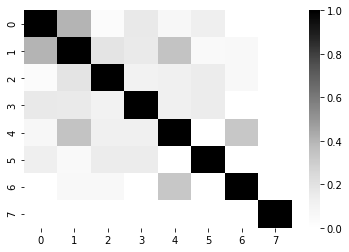

In [97]:
import seaborn as sns
ax = sns.heatmap(csim, cmap='Greys')
print(ax)

In [102]:
print("los textos que más se parecen entre si son:")
print(mensajes_total[0])
print("Y")
print(mensajes_total[1])

los textos que más se parecen entre si son:
He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?
Y
Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN


## 2

In [173]:
df=pd.read_csv("Spotify-2000.csv")

In [174]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [175]:
def combined_features(row):
    return row['Artist']+" "+row['Top Genre']
df["Artista_y_genero"] = df.apply(combined_features, axis =1)

In [176]:
vectorizer = CountVectorizer().fit_transform(df['Artista_y_genero'])
vectors = vectorizer.toarray()

In [177]:
csim = cosine_similarity(vectors)

In [207]:
artist=df.iloc[22,-1]
print(artist)
cantante=df.iloc[22,2]
print(cantante)
cancion=df.iloc[22,1]
print(cancion)

Jan Smit dutch pop
Jan Smit
Als De Morgen Is Gekomen


In [179]:
df.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity', 'Artista_y_genero'],
      dtype='object')

In [180]:
def get_index_from_title(title):
    return df[df.Artista_y_genero == title]["Index"].values[0]

song_index = get_index_from_title(artist)

In [181]:
print("El indice 25 que es (Jan Smit dutch pop) tiene el indice:",song_index)

El indice 25 que es (Jan Smit dutch pop) tiene el indice: 23


In [182]:
similar_songs = list(enumerate(csim[song_index])) 

In [194]:
sorted_similar_songs = sorted(similar_songs, key=lambda x:x[1], reverse=True)

In [223]:
def get_title_from_index(index):
    return df[df.index == index]["Artista_y_genero"].values[0]

def get_song_from_index(index):
    return df[df.index == index]["Title"].values[0]

# for song in sorted_similar_songs[:5]:
#     print(get_title_from_index(song[0]))
    
canciones = []
for song in sorted_similar_songs[:5]: 
    canciones.append(str(get_title_from_index(song[0])))
    
musicote = []
for song in sorted_similar_songs[:5]: 
    musicote.append(str(get_song_from_index(song[0])))

In [233]:
print('Canciones similares a:', "'",cancion, "del artista:", cantante ,"'")

Canciones similares a: ' Als De Morgen Is Gekomen del artista: Jan Smit '


In [236]:
for i in [0,1,2,3,4]:
    print(musicote[i], "-> Artista",canciones[i])

Mr. Brightside -> Artista The Killers modern rock
Somebody Told Me -> Artista The Killers modern rock
Human -> Artista The Killers modern rock
How to Save a Life -> Artista The Fray modern rock
Uncertain Smile -> Artista The The art rock


5